## Outliers

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df_raw = pd.read_csv('../Data/housing.csv')

In [14]:
df_raw.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df_raw.shape

(20640, 10)

(array([1.7525e+04, 2.5580e+03, 3.7200e+02, 1.0300e+02, 4.9000e+01,
        1.6000e+01, 7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([2.00000e+00, 3.93380e+03, 7.86560e+03, 1.17974e+04, 1.57292e+04,
        1.96610e+04, 2.35928e+04, 2.75246e+04, 3.14564e+04, 3.53882e+04,
        3.93200e+04]),
 <BarContainer object of 10 artists>)

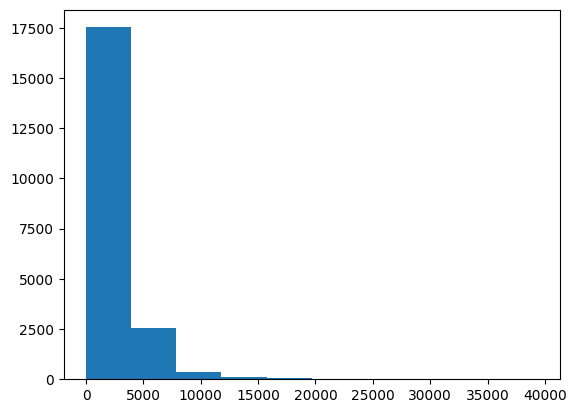

In [16]:
plt.hist(df_raw['total_rooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20bb9ee9250>,
 'caps': [<matplotlib.lines.Line2D at 0x20bb9ef3250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20bba1260d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20bb9ef4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x20bb9ef5190>],
 'means': []}

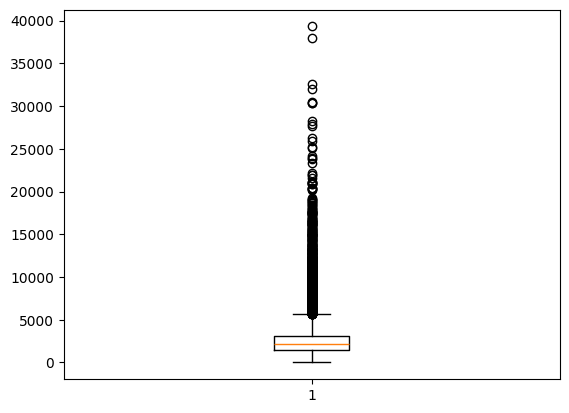

In [17]:
plt.boxplot(df_raw['total_rooms'])

> Tạo hàm tự động xác định và loại bỏ outliers bằng phương pháp STD

In [21]:
def find_outliers_std(data):
    # tính giá trị biên Upper/Lower
    mean_data = np.mean(data)
    std_data = np.std(data)
    limit = 3 * std_data
    lower = mean_data - limit
    upper = mean_data + limit

    # xác định outliers
    outliers_index = np.where((data > upper) | (data < lower))

    # Thông báo thông tin về các outliers đã xóa
    if(len(outliers_index)):
        print(f'Number of outliers: {len(outliers_index)}')
        print(f'Number of non-outliers: {len(data) - len(outliers_index)}')
        # return the data with the outliers removed
        return np.delete(data, outliers_index)
    else:
        print('No outliers')
        return data

In [25]:
df_raw['total_rooms'] = find_outliers_std(df_raw['total_rooms'])

Number of outliers: 1
Number of non-outliers: 20639


In [26]:
df_raw.shape

(20640, 10)